## Text-to-Image Generation using Stable Diffusion and Diffusers

In this notebook we shall learn

* how to generate images using text prompts
* the various diffusion pipelines for tasks such as text-to-image, image-to-image, text-to-music
* primary components of the diffusion pipeline: UNet model and schedulers

Diffusers library (HuggingFace): enables using SoTA diffusion models for generating images, audio, 3D structures of molecules

* Diffusion Pipeline wraps the complexity of the entire diffusion system into easy to use API

In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers gradio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta

In [22]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [23]:
!pip show torch

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchdata, torchtext, torchvision


In [24]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [33]:
prompt = """A sketch shows two robots talking to each other, featuring a surreal look and narrow aspect ratio.
"""

In [34]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A sketch shows two robots talking to each other, featuring a surreal look and narrow aspect ratio.



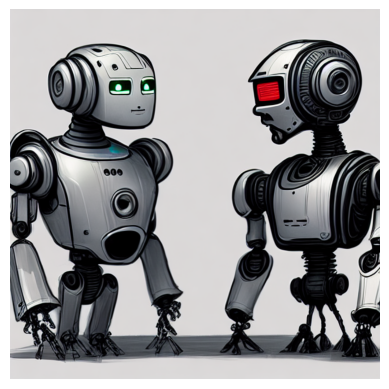

In [35]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [36]:
prompt2 = """A sketch shows two robots talking to each other, featuring a surreal look and narrow aspect ratio."""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A sketch shows two robots talking to each other, featuring a surreal look and narrow aspect ratio.


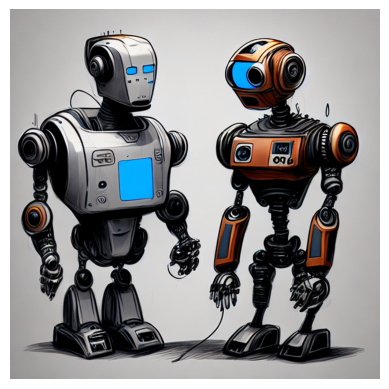

In [37]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [10]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [27]:
prompt = """The day started gloomy, not quite letting on what beautiful things could happen on a day like this.
“Hey! Wait for me please!”. They stopped dead in their tracks, their breath shallow and wondering why that voice still made them feel this way.
Meeting the love of your life in a police station does not make for a good story to tell the grandchildren, but definitely an interesting one.
The alarm clock woke her up from a very lovely dream.
She hurried over the busy streets, slaloming between honking cars, four large cups of Iced Coffee balancing in her hand and she should have kept her eyes up in order to prevent what was about to happen.
The dark brown eyes were the first thing he noticed.
Day in day out, it was always the same time, same place, same people and he was used to this implicitly agreed upon order of things.
Later they would say it was love at first sight, but both knew it was a long road they had to take to get here.
With all the drama in the morning, she did not expect her day to get any better.
He liked watching her, when she was in her element – the confident beauty she radiated."""

params = {}

Token indices sequence length is longer than the specified maximum sequence length for this model (247 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', but definitely an interesting one. the alarm clock woke her up from a very lovely dream. she hurried over the busy streets, slaloming between honking cars, four large cups of iced coffee balancing in her hand and she should have kept her eyes up in order to prevent what was about to happen. the dark brown eyes were the first thing he noticed. day in day out, it was always the same time, same place, same people and he was used to this implicitly agreed upon order of things. later they would say it was love at first sight, but both knew it was a long road they had to take to get here. with all the drama in the morning, she did not expect her day to get any better. he liked watching her, when she was in he

  0%|          | 0/50 [00:00<?, ?it/s]

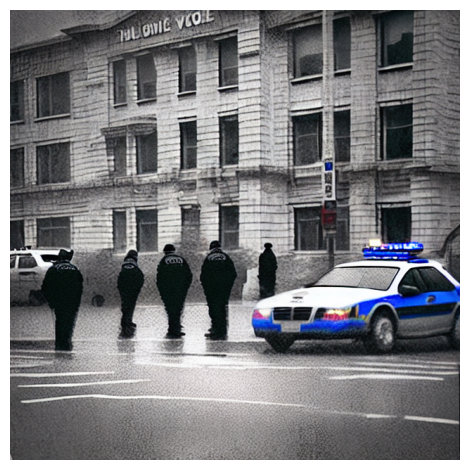

In [28]:
generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', but definitely an interesting one. the alarm clock woke her up from a very lovely dream. she hurried over the busy streets, slaloming between honking cars, four large cups of iced coffee balancing in her hand and she should have kept her eyes up in order to prevent what was about to happen. the dark brown eyes were the first thing he noticed. day in day out, it was always the same time, same place, same people and he was used to this implicitly agreed upon order of things. later they would say it was love at first sight, but both knew it was a long road they had to take to get here. with all the drama in the morning, she did not expect her day to get any better. he liked watching her, when she was in her element – the confident beauty she radiated.']


  0%|          | 0/100 [00:00<?, ?it/s]

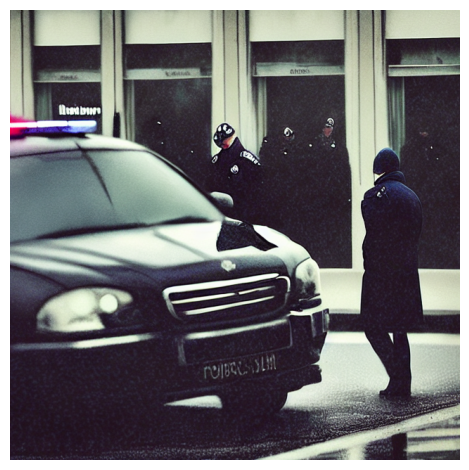

In [29]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', but definitely an interesting one. the alarm clock woke her up from a very lovely dream. she hurried over the busy streets, slaloming between honking cars, four large cups of iced coffee balancing in her hand and she should have kept her eyes up in order to prevent what was about to happen. the dark brown eyes were the first thing he noticed. day in day out, it was always the same time, same place, same people and he was used to this implicitly agreed upon order of things. later they would say it was love at first sight, but both knew it was a long road they had to take to get here. with all the drama in the morning, she did not expect her day to get any better. he liked watching her, when she was in her element – the confident beauty she radiated.']


  0%|          | 0/100 [00:00<?, ?it/s]

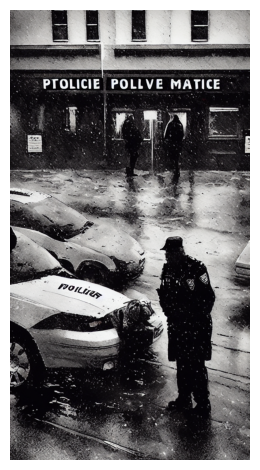

In [30]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', but definitely an interesting one. the alarm clock woke her up from a very lovely dream. she hurried over the busy streets, slaloming between honking cars, four large cups of iced coffee balancing in her hand and she should have kept her eyes up in order to prevent what was about to happen. the dark brown eyes were the first thing he noticed. day in day out, it was always the same time, same place, same people and he was used to this implicitly agreed upon order of things. later they would say it was love at first sight, but both knew it was a long road they had to take to get here. with all the drama in the morning, she did not expect her day to get any better. he liked watching her, when she was in her element – the confident beauty she radiated.']


  0%|          | 0/100 [00:00<?, ?it/s]

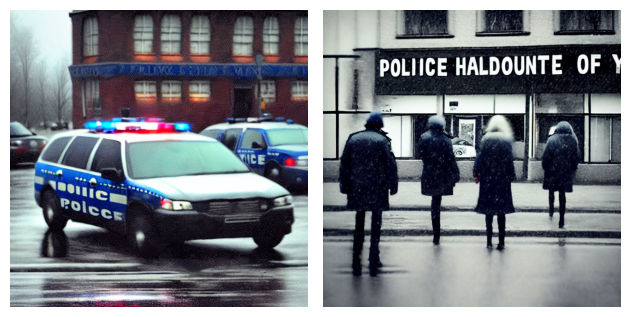

In [31]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', but definitely an interesting one. the alarm clock woke her up from a very lovely dream. she hurried over the busy streets, slaloming between honking cars, four large cups of iced coffee balancing in her hand and she should have kept her eyes up in order to prevent what was about to happen. the dark brown eyes were the first thing he noticed. day in day out, it was always the same time, same place, same people and he was used to this implicitly agreed upon order of things. later they would say it was love at first sight, but both knew it was a long road they had to take to get here. with all the drama in the morning, she did not expect her day to get any better. he liked watching her, when she was in her element – the confident beauty she radiated.']


  0%|          | 0/100 [00:00<?, ?it/s]

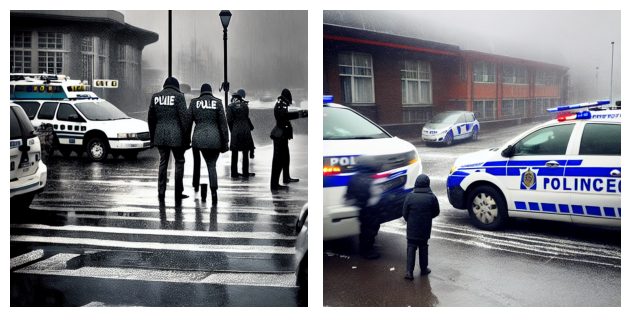

In [32]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

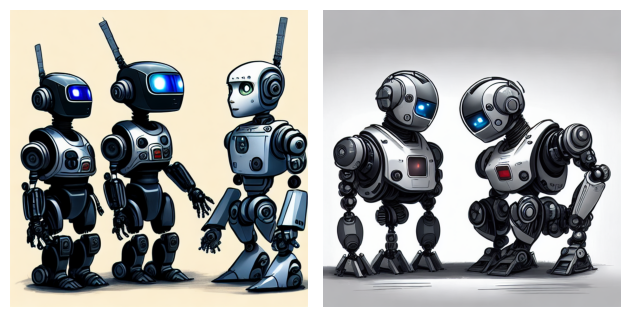

In [38]:
generate_image(pipe, prompt2, params)

### Creating an interface

In [18]:
def generate_image_interface(prompt, negative_prompt, num_inference_steps=50, weight=640):
  params = {'prompt': prompt, 'num_inference_steps': num_inference_steps, 'num_images_per_prompt':2, 'height':int(1.2*weight),
            'weight': weight, 'negative_prompt': negative_prompt}

  img = pipe(**params).images
  return img[0],img[1]

In [19]:
import gradio as gr

In [20]:
demo = gr.Interface(generate_image_interface, inputs=["text","text",gr.Slider(1,100),gr.Slider(512,640)], outputs=["image","image"])

In [21]:
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ea1cf3614ad2440bcb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Understanding diffusion models

Diffusion models have beaten GANs in image generation

2 primary components

* UNet model: takes a random noise to generate the noise residual
* Scheduler: uses the noise residual to generate a less noisy image

Pipelines such as Stable diffusion, use additional component (tokenizers) to convert the prompt to embeddings